# Research Question

*Kira Plastinina* is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. 

General Outline of the project:
1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
6. Implement the Solution
7. Challenge the Solution
8. Follow up Questions

## Problem Definition

The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

- Perform clustering and dimensionality reduction stating insights drawn from your analysis and visualizations.
- Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering, PCA vs t SNE highlighting the strengths and limitations of each approach in the context of your analysis. 

Your findings should help inform the team in formulating the marketing and sales strategies of the brand. 


## Data Sourcing
## Load the Dataset

In [1]:
# Importing the necessary R libraries
library(tidyverse)
library(magrittr)
library(corrplot)
library(caret)
options(warn = -1)

library(grid)
theme_set(theme_bw())
options(warn = -1)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract

corrplot 0.84 loaded
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



The dataset can be obtained from the following link [ http://bit.ly/EcommerceCustomersDataset ]

In [2]:
shoppers = read.csv('online_shoppers_intention.csv')

head(shoppers,5)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20,0.20,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00,0.10,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20,0.20,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE


## Check The Data 

**Analysis of the Shoppers Dataset**

How many rows and columns does the shoppers dataset have?

In [3]:
print("The number of rows in the shoppers dataset:",quote=FALSE)
nrow(shoppers)

print("The number of columns in the shoppers dataset:",quote=FALSE)
ncol(shoppers)

[1] The number of rows in the shoppers dataset:


[1] 12330

[1] The number of columns in the shoppers dataset:


[1] 18

**What are the data types of the shoppers dataset?**

In [4]:
sapply(shoppers, class)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"                "factor"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
               "factor"               "logical"               "logical"

The dataset consists of 10 numerical and 8 categorical attributes.

- The 'Revenue' attribute can be used as the class label.

- 'Administrative', 'Administrative Duration', 'Informational', 'Informational Duration', 'Product Related' and 'Product Related Duration' represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 

- The 'Bounce Rate', 'Exit Rate' and 'Page Value' features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
The value of the 'Bounce Rate' feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
The value of the 'Exit Rate' feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

- The 'Special Day' feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. 
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a non-zero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

- The dataset also includes the 'operating system', 'browser', 'region', 'traffic type', 'visitor type' as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Data Cleaning

**Are there missing values in the shoppers dataset?**

In [5]:
colSums(is.na(shoppers))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

I decide to drop the rows with missing values since they are only 14 missing rows out of about 12000 

In [6]:
shoppers = na.omit(shoppers)

# Check for missing values

colSums(is.na(shoppers))

# Check for number of remaining columns
print("The number of rows in the shoppers dataset:",quote=FALSE)
nrow(shoppers)

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

[1] The number of rows in the shoppers dataset:


[1] 12316

Missing values have been imputed.

**Finding Duplicates in the shoppers dataset**

In [7]:
#Find the duplicated rows in the dataset

duplicated_rows = shoppers[duplicated(shoppers),]

head(duplicated_rows)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE


In [8]:
#Remove the duplicated rows
shoppers = distinct(shoppers)

print("The number of non-duplicated rows in the shoppers dataset:",quote=FALSE)
nrow(shoppers)

[1] The number of non-duplicated rows in the shoppers dataset:


[1] 12199

## Univariate Analysis

**Distribution of Months**

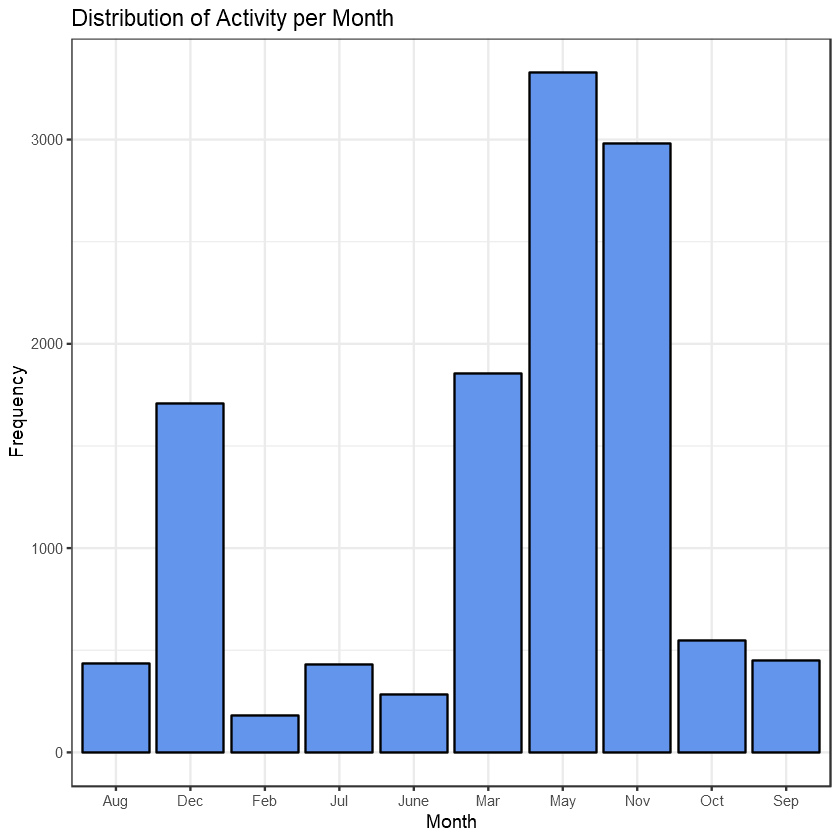

In [9]:
library(ggplot2)

data(shoppers, package = "mosaicData")

#Plot the distribution of months
ggplot(shoppers, aes(x = Month)) + 
  geom_bar(fill = "cornflowerblue", 
           color="black") +
  labs(x = "Month", 
       y = "Frequency", 
       title = "Distribution of Activity per Month")

May and November seem to have the most activity.

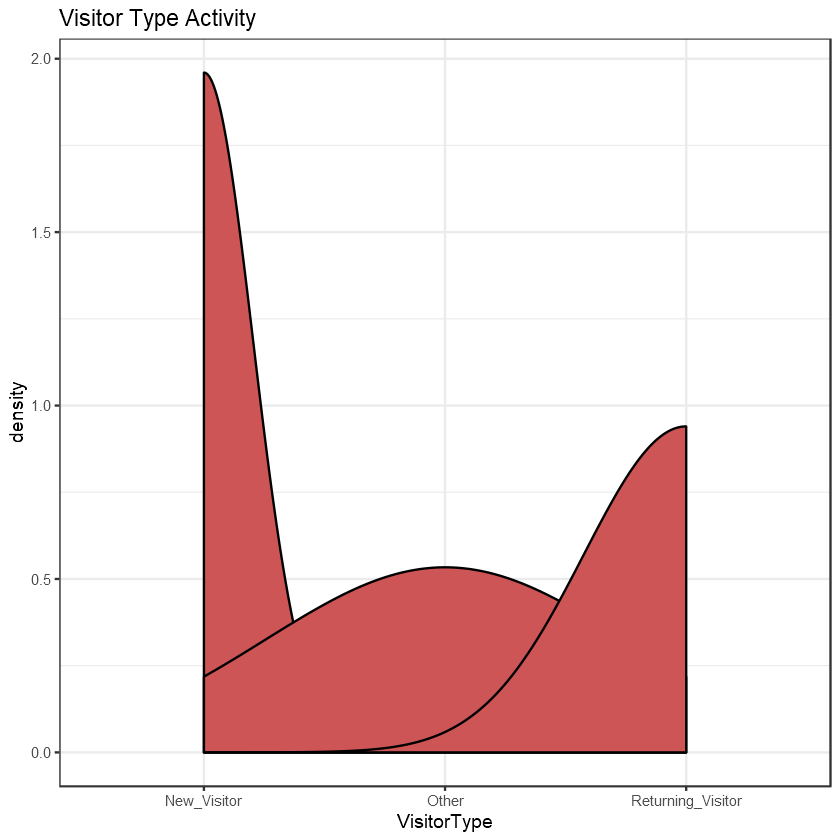

In [10]:
#Create a kernel density plot of VisitorType

ggplot(shoppers, aes(x = VisitorType)) +
  geom_density(fill = "indianred3") + 
  labs(title = "Visitor Type Activity")

**Correlation Plots**

In [11]:
install.packages("ggcorrplot")

Installing package into 'C:/Users/maryk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\maryk\AppData\Local\Temp\RtmpYLHvDh\downloaded_packages


In [12]:
library(ggcorrplot)

In [13]:
#Select numeric variables
df <- dplyr::select_if(shoppers, is.numeric)

# calulate the correlations
r <- cor(df, use="complete.obs")
round(r,2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.00,0.60,0.38,0.25,0.43,0.37,-0.21,-0.31,0.10,-0.10,-0.01,-0.03,-0.01,-0.03
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.35,-0.14,-0.20,0.07,-0.07,-0.01,-0.02,-0.01,-0.02
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.11,-0.16,0.05,-0.05,-0.01,-0.04,-0.03,-0.04
Informational_Duration,0.25,0.24,0.62,1.00,0.28,0.35,-0.07,-0.10,0.03,-0.03,-0.01,-0.02,-0.03,-0.03
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.19,-0.29,0.05,-0.03,0.00,-0.01,-0.04,-0.04
ProductRelated_Duration,0.37,0.35,0.39,0.35,0.86,1.00,-0.17,-0.25,0.05,-0.04,0.00,-0.01,-0.03,-0.04
BounceRates,-0.21,-0.14,-0.11,-0.07,-0.19,-0.17,1.00,0.90,-0.12,0.09,0.03,-0.02,0.00,0.09
ExitRates,-0.31,-0.20,-0.16,-0.10,-0.29,-0.25,0.90,1.00,-0.17,0.12,0.02,0.00,0.00,0.09
PageValues,0.10,0.07,0.05,0.03,0.05,0.05,-0.12,-0.17,1.00,-0.06,0.02,0.05,0.01,0.01
SpecialDay,-0.10,-0.07,-0.05,-0.03,-0.03,-0.04,0.09,0.12,-0.06,1.00,0.01,0.00,-0.02,0.05


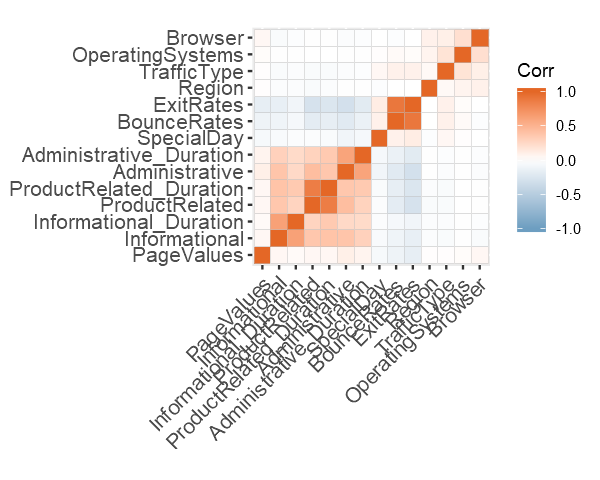

In [14]:
options(repr.plot.width = 5, repr.plot.height = 4)

corr = round(cor(select_if(shoppers, is.numeric)), 2)
ggcorrplot(corr, hc.order = T, ggtheme = ggplot2::theme_gray,
   colors = c("#6D9EC1", "white", "#E46726"), lab = F)

**Encoding the shoppers dataset**

In [15]:
dmy = dummyVars(" ~ .", data = shoppers)

shoppers = data.frame(predict(dmy, newdata = shoppers))
head(shoppers,10)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE,RevenueFALSE,RevenueTRUE
0,0,0,0,1,0.000000,0.20000000,0.20000000,0,0.0,...,1,1,1,0,0,1,1,0,1,0
0,0,0,0,2,64.000000,0.00000000,0.10000000,0,0.0,...,2,1,2,0,0,1,1,0,1,0
0,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.0,...,1,9,3,0,0,1,1,0,1,0
0,0,0,0,2,2.666667,0.05000000,0.14000000,0,0.0,...,2,2,4,0,0,1,1,0,1,0
0,0,0,0,10,627.500000,0.02000000,0.05000000,0,0.0,...,3,1,4,0,0,1,0,1,1,0
0,0,0,0,19,154.216667,0.01578947,0.02456140,0,0.0,...,2,1,3,0,0,1,1,0,1,0
0,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.4,...,4,3,3,0,0,1,1,0,1,0
1,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.0,...,2,1,5,0,0,1,0,1,1,0
0,0,0,0,2,37.000000,0.00000000,0.10000000,0,0.8,...,2,2,3,0,0,1,1,0,1,0
0,0,0,0,3,738.000000,0.00000000,0.02222222,0,0.4,...,4,1,2,0,0,1,1,0,1,0


## K-Means Clustering

In [16]:
#Revenue is the label class; hence it should be saved in a different dataset

shoppers_copy = shoppers[, -c(30:31)]
head(shoppers_copy)

shop.class = shoppers[, c(30:31)]
head(shop.class)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month.Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,...,0,1,1,1,1,0,0,1,1,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,...,0,2,2,1,2,0,0,1,1,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,...,0,4,1,9,3,0,0,1,1,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,...,0,3,2,2,4,0,0,1,1,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,...,0,3,3,1,4,0,0,1,0,1
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,...,0,2,2,1,3,0,0,1,1,0


RevenueFALSE,RevenueTRUE
1,0
1,0
1,0
1,0
1,0
1,0


In [17]:
#Normalize the data?? 

shoppers_norm = as.data.frame(apply(shoppers_copy, 2, function(x) (x - min(x))/(max(x)-min(x))))
head(shoppers_norm)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month.Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE
0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,...,0,0.0000000,0.00000000,0.000,0.00000000,0,0,1,1,0
0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,...,0,0.1428571,0.08333333,0.000,0.05263158,0,0,1,1,0
0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,...,0,0.4285714,0.00000000,1.000,0.10526316,0,0,1,1,0
0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,...,0,0.2857143,0.08333333,0.125,0.15789474,0,0,1,1,0
0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,...,0,0.2857143,0.16666667,0.000,0.15789474,0,0,1,0,1
0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,...,0,0.1428571,0.08333333,0.000,0.10526316,0,0,1,1,0


In [18]:
#Summary of the normalized data.
summary(shoppers_norm)

 Administrative    Administrative_Duration Informational   
 Min.   :0.00000   Min.   :0.0000000       Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0002941       1st Qu.:0.0000  
 Median :0.03704   Median :0.0029414       Median :0.0000  
 Mean   :0.08667   Mean   :0.0243201       Mean   :0.0212  
 3rd Qu.:0.14815   3rd Qu.:0.0281638       3rd Qu.:0.0000  
 Max.   :1.00000   Max.   :1.0000000       Max.   :1.0000  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :0.0000000      Min.   :0.00000   Min.   :0.000000       
 1st Qu.:0.0003921      1st Qu.:0.01135   1st Qu.:0.003042       
 Median :0.0003921      Median :0.02553   Median :0.009543       
 Mean   :0.0140518      Mean   :0.04547   Mean   :0.018891       
 3rd Qu.:0.0003921      3rd Qu.:0.05390   3rd Qu.:0.023112       
 Max.   :1.0000000      Max.   :1.00000   Max.   :1.000000       
  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :0.00000   Min.   :0.00000   Min.   :

**Search for Optimal Number of Clusters using the Elbow method**

In [19]:
#Install the necessary libraries
install.packages("factoextra")
library(factoextra)


Installing package into 'C:/Users/maryk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\maryk\AppData\Local\Temp\RtmpYLHvDh\downloaded_packages


Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [20]:
install.packages("ggsignif")

Installing package into 'C:/Users/maryk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggsignif' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\maryk\AppData\Local\Temp\RtmpYLHvDh\downloaded_packages


In [21]:
library(ggsignif)

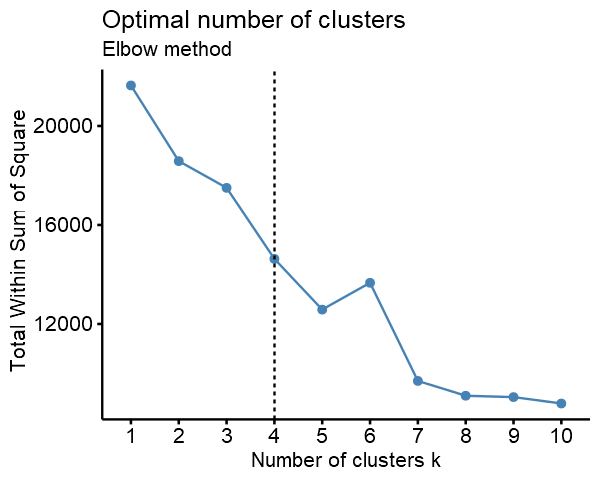

In [22]:
fviz_nbclust(shoppers_norm, kmeans, method = "wss") +
    geom_vline(xintercept = 4, linetype = 2)+
  labs(subtitle = "Elbow method")

In [34]:
#Compute k-means with k = 4

set.seed(123)
shoppers_km = kmeans(shoppers_norm, 4, nstart = 25)

print(shoppers_km)

K-means clustering with 4 clusters of sizes 2380, 2377, 5749, 1693

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1     0.06761594              0.01926421    0.01682423            0.010404632
2     0.09147852              0.02516738    0.02657411            0.018095512
3     0.09023792              0.02517203    0.02293877            0.015689699
4     0.09457242              0.02734484    0.01390530            0.007939552
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1     0.03781274             0.015481442  0.14193483 0.2589451 0.01183969
2     0.05139561             0.021045629  0.10065848 0.2024227 0.01585351
3     0.05204063             0.022037872  0.10897834 0.2190788 0.01468419
4     0.02562408             0.009969113  0.02573067 0.1028730 0.02979445
   SpecialDay  Month.Aug Month.Dec    Month.Feb  Month.Jul Month.June Month.Mar
1 0.225966387 0.00000000 0.0000000 0.0000000000 0.00000000 0.00000000 0.00000

In [35]:
aggregate(shoppers_norm, by=list(cluster=shoppers_km$cluster), mean)

cluster,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month.Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE
1,0.06761594,0.01926421,0.01682423,0.010404632,0.03781274,0.015481442,0.14193483,0.2589451,0.01183969,...,0.00000000,0.1640456,0.1169468,0.2625000,0.1896727,0,0.000000000,1.0000000,1.0000000,0.0000000
2,0.09147852,0.02516738,0.02657411,0.018095512,0.05139561,0.021045629,0.10065848,0.2024227,0.01585351,...,0.03113168,0.1619689,0.1033516,0.2642512,0.1622789,0,0.002944889,0.9970551,0.0000000,1.0000000
3,0.09023792,0.02517203,0.02293877,0.015689699,0.05204063,0.022037872,0.10897834,0.2190788,0.01468419,...,0.04626892,0.1626867,0.1173972,0.2695251,0.1534546,0,0.012871804,0.9871282,1.0000000,0.0000000
4,0.09457242,0.02734484,0.01390530,0.007939552,0.02562408,0.009969113,0.02573067,0.1028730,0.02979445,...,0.06379209,0.1469074,0.1073538,0.2841849,0.1504337,1,0.000000000,0.0000000,0.7170703,0.2829297


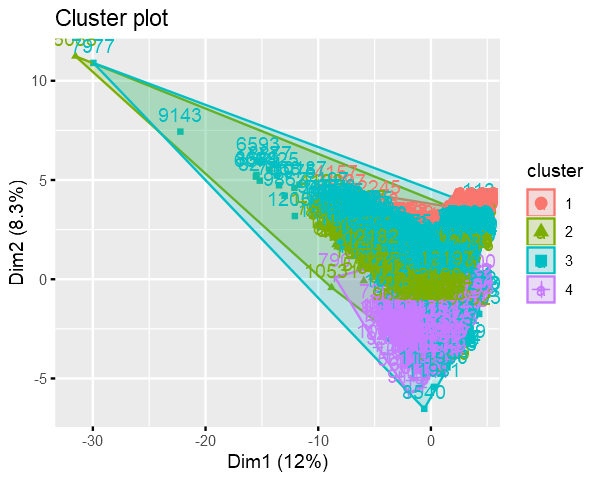

In [36]:
fviz_cluster(shoppers_km, data = shoppers_norm)

## Hierarchical Clustering

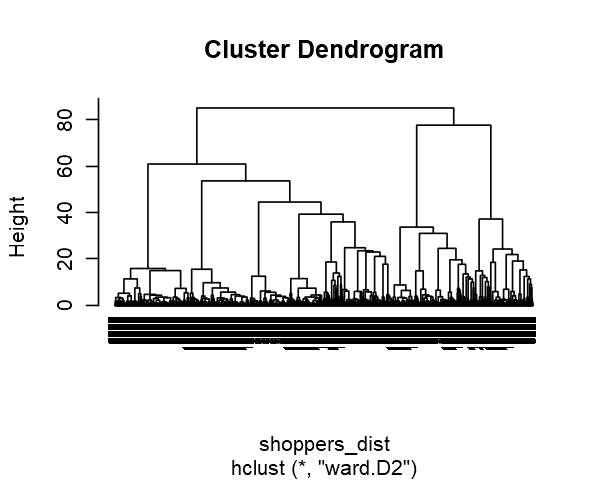

In [39]:
#First we use the dist() to compute the Euclidean distance btwn observation points
shoppers_dist = dist(shoppers_norm, method = "euclidean")

#Set the hclust() dissimilairty matrix
#We then apply hierarchical clustering using the Ward's method
shoppers_hc = hclust(shoppers_dist, method = "ward.D2")

#Plot the obtained dendrogram
plot(shoppers_hc, cex = 0.6, hang = -1)


## Principal Component Analysis (PCA)

In [40]:
shoppers_norm_pca = prcomp(shoppers_norm,center = TRUE,scale = FALSE) 

summary(shoppers_norm_pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     0.6027 0.5249 0.4890 0.4369 0.37908 0.31341 0.30033
Proportion of Variance 0.2047 0.1553 0.1348 0.1076 0.08101 0.05537 0.05085
Cumulative Proportion  0.2047 0.3600 0.4948 0.6024 0.68343 0.73880 0.78965
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.25907 0.21400 0.20283 0.19014 0.18821 0.17371 0.15733
Proportion of Variance 0.03784 0.02582 0.02319 0.02038 0.01997 0.01701 0.01395
Cumulative Proportion  0.82748 0.85330 0.87649 0.89687 0.91684 0.93385 0.94781
                          PC15   PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.15027 0.1298 0.12147 0.11865 0.08500 0.06923 0.06523
Proportion of Variance 0.01273 0.0095 0.00832 0.00794 0.00407 0.00270 0.00240
Cumulative Proportion  0.96054 0.9700 0.97835 0.98629 0.99036 0.99307 0.99546
                          PC22    PC23    PC24

29 principal components are obtained explaining a percentate of the total variation of the dataset.